In [2]:
from bs4 import BeautifulSoup
from urllib2 import urlopen



In [99]:
from dateutil.parser import parse

def parsePage(page):
    bs=BeautifulSoup(urlopen('http://www.dorh.hr'+page),'lxml')
    a=bs.find(class_='Lead')
    
    if a==None:
        return ''
    
    if a.string == None:
        a=a.contents[0]    
    
    d=a.string.strip()
    i=d.rfind('(')
    
    try:
        dt=parse(d[i+1:-1].replace(' ',''))
    except ValueError:
        print d
        return ''
    
    return dt
    
    
parsePage('/PodignutaOptuznicaProtivH.')

''

In [106]:
def processList(url):
    
    bs=BeautifulSoup(urlopen(url),'lxml')
    
    res=[]
    for h in bs.findAll(class_='ArticleHeading'):
        a=h.a
        if a == None:
            continue
        l=a['href']
        t=a.findAll(text=True)
        t=[n.string for n in t]
        t="".join(t).strip()
        if(t.startswith('Podignuta')):
            dt=parsePage(l)
            res.append((t,dt))

            print t+" >> "+str(dt)
            
    return res

In [107]:
res=processList('http://www.dorh.hr/Default.aspx?sec=56')
res=res+processList('http://www.dorh.hr/Arhiva2013')
res=res+processList('http://www.dorh.hr/Arhiva2012')
res=res+processList('http://www.dorh.hr/Arhiva2011')
res=res+processList('http://www.dorh.hr/Arhiva2010')
res=res+processList('http://www.dorh.hr/Arhiva2009')
res=res+processList('http://www.dorh.hr/Default.aspx?sec=656')
res=res+processList('http://www.dorh.hr/Default.aspx?sec=657')
res=res+processList('http://www.dorh.hr/Default.aspx?sec=602')
res=res+processList('http://www.dorh.hr/Default.aspx?sec=603')

Podignuta optužnica protiv petero okrivljenika >> 2015-08-07 00:00:00
Podignuta optužnica protiv devetero okrivljenika >> 2015-01-07 00:00:00
Podignuta optužnica protiv trojice okrivljenika >> 2015-06-18 00:00:00
Podignuta optužnica protiv 10 okrivljenika >> 2015-11-06 00:00:00
Podignuta optužnica protiv osmoro okrivljenika >> 2015-11-06 00:00:00
Podignuta optužnica protiv 13 okrivljenika >> 2015-05-06 00:00:00
Podignuta optužnica protiv gradonačelnika Zagreba i dvoje okrivljenika >> 2015-03-06 00:00:00
Podignuta optužnica protiv petorice okrivljenika >> 2015-02-06 00:00:00
Podignuta optužnica protiv šestoro okrivljenika i jednog trgovačkog društva >> 2015-02-06 00:00:00
Podignuta optužnica protiv 11 okrivljenika >> 2015-05-22 00:00:00
Podignuta optužnica protiv šestoro okrivljenika >> 2015-05-18 00:00:00
Podignuta optužnica protiv četvorice okrivljenika >> 2015-06-05 00:00:00
Podignuta optužnica protiv petoro okrivljenika >> 2015-04-28 00:00:00
Podignuta optužnica protiv gradonačelnik

In [116]:
dates=[]
for i in res:
    if i[1]:
        dates.append(i[1])

print dates

[datetime.datetime(2015, 8, 7, 0, 0), datetime.datetime(2015, 1, 7, 0, 0), datetime.datetime(2015, 6, 18, 0, 0), datetime.datetime(2015, 11, 6, 0, 0), datetime.datetime(2015, 11, 6, 0, 0), datetime.datetime(2015, 5, 6, 0, 0), datetime.datetime(2015, 3, 6, 0, 0), datetime.datetime(2015, 2, 6, 0, 0), datetime.datetime(2015, 2, 6, 0, 0), datetime.datetime(2015, 5, 22, 0, 0), datetime.datetime(2015, 5, 18, 0, 0), datetime.datetime(2015, 6, 5, 0, 0), datetime.datetime(2015, 4, 28, 0, 0), datetime.datetime(2015, 2, 13, 0, 0), datetime.datetime(2015, 10, 2, 0, 0), datetime.datetime(2015, 1, 23, 0, 0), datetime.datetime(2015, 2, 1, 0, 0), datetime.datetime(2014, 12, 30, 0, 0), datetime.datetime(2014, 12, 29, 0, 0), datetime.datetime(2014, 12, 17, 0, 0), datetime.datetime(2014, 8, 12, 0, 0), datetime.datetime(2013, 11, 26, 0, 0), datetime.datetime(2014, 11, 21, 0, 0), datetime.datetime(2014, 11, 21, 0, 0), datetime.datetime(2014, 11, 14, 0, 0), datetime.datetime(2014, 3, 10, 0, 0), datetime.dat

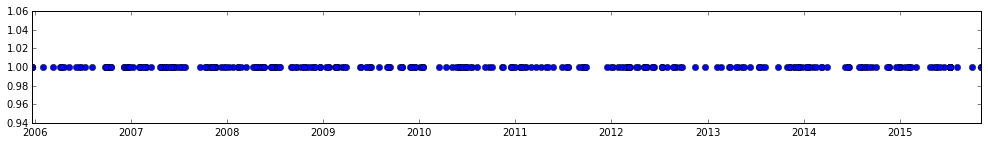

In [121]:
import matplotlib
import matplotlib.pyplot as P
import numpy
%matplotlib inline

mpd = matplotlib.dates.date2num(dates)
P.figure(figsize=(17,2))
P.plot_date(mpd,numpy.ones(len(dates)))


ValueError: Illegal format string "-*"; two linestyle symbols

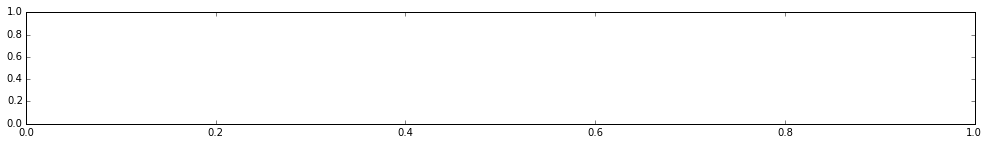

In [144]:
months={}
for d in dates:
    d.replace(day=1)
    if d in months:
        months[d]=months[d]+1
    else:
        months[d]=1

mk=sorted(months.keys())
mv=[months[m] for m in mk]
        
mpd = matplotlib.dates.date2num(mk)
P.figure(figsize=(17,2))
P.plot_date(mpd,mv,'-*')
P.title('Broj optuznica po mjesecima')